In [ ]:
dimport numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.model_selection import train_test_split

In [ ]:
train_data = pd.read_csv("/content/drive/MyDrive/STROKE PREDICTION/train.csv")
test_data = pd.read_csv("/content/drive/MyDrive/STROKE PREDICTION/test.csv")


In [ ]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


In [ ]:
train_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


In [ ]:
train_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
test_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

EDA

<Axes: xlabel='stroke', ylabel='count'>

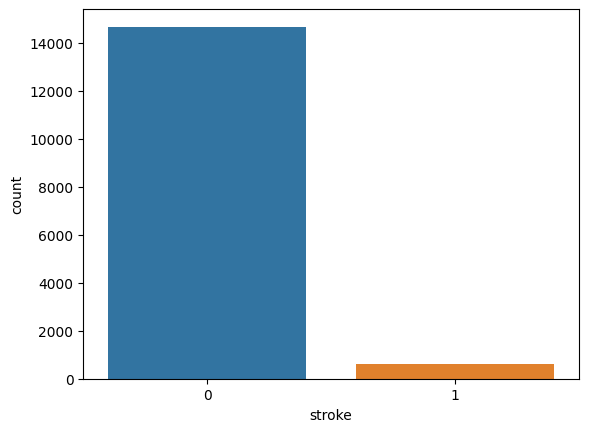

In [ ]:
sns.countplot(x='stroke', data=train_data)

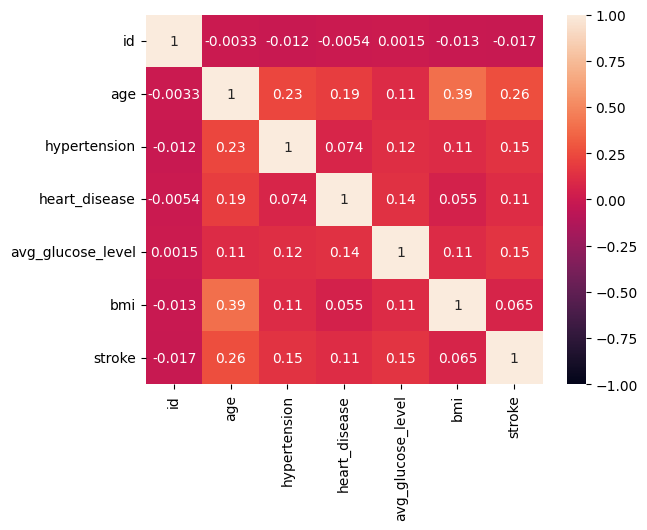

<Figure size 2000x2000 with 0 Axes>

In [ ]:
corr_matrix = train_data.corr()
sns.heatmap(corr_matrix,annot=True, vmin=-1, vmax=1, square = False)
plt.figure(figsize = (20,20))
plt.show()

In [ ]:
print(train_data['gender'].unique())
print(train_data['work_type'].unique())
print(train_data['smoking_status'].unique())
print(train_data['stroke'].value_counts())

['Male' 'Female' 'Other']
['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
['never smoked' 'formerly smoked' 'Unknown' 'smokes']
0    14672
1      632
Name: stroke, dtype: int64


In [ ]:
train_data['gender'] = train_data['gender'].replace({'Male':0 , 'Female':1,'Other':2})
train_data['ever_married'] = train_data['ever_married'].replace({'Yes':1, 'No':0})
train_data['work_type'] = train_data['work_type'].replace({'Private':0 ,'Self-employed':1 ,'Govt_job':2, 'children':3, 'Never_worked':4})
train_data['Residence_type'] = train_data['Residence_type'].replace({'Urban':0, 'Rural':1})
train_data['smoking_status'] = train_data['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'Unknown':2, 'smokes':3})

In [ ]:
train_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,28.0,0,0,1,0,0,79.53,31.1,0,0
1,1,0,33.0,0,0,1,0,1,78.44,23.9,1,0
2,2,1,42.0,0,0,1,0,1,103.00,40.3,2,0
3,3,0,56.0,0,0,1,0,0,64.87,28.8,0,0
4,4,1,24.0,0,0,0,0,1,73.36,28.8,0,0


In [ ]:
test_data['gender'] = train_data['gender'].replace({'Male':0 , 'Female':1,'Other':2})
test_data['ever_married'] = train_data['ever_married'].replace({'Yes':1, 'No':0})
test_data['work_type'] = train_data['work_type'].replace({'Private':0 ,'Self-employed':1 ,'Govt_job':2, 'children':3, 'Never_worked':4})
test_data['Residence_type'] = train_data['Residence_type'].replace({'Urban':0, 'Rural':1})
test_data['smoking_status'] = train_data['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'Unknown':2, 'smokes':3})

In [ ]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,0,57.0,0,0,1,0,0,82.54,33.4,0
1,15305,0,70.0,1,0,1,0,1,72.06,28.5,1
2,15306,1,5.0,0,0,1,0,1,103.72,19.5,2
3,15307,0,56.0,0,0,1,0,0,69.24,41.4,0
4,15308,1,32.0,0,0,0,0,1,111.15,30.1,0


In [ ]:
test_data.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [ ]:
train_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,0,28.0,0,0,1,0,0,79.53,31.1,0,0
1,1,0,33.0,0,0,1,0,1,78.44,23.9,1,0
2,2,1,42.0,0,0,1,0,1,103.00,40.3,2,0
3,3,0,56.0,0,0,1,0,0,64.87,28.8,0,0
4,4,1,24.0,0,0,0,0,1,73.36,28.8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,1,22.0,0,0,0,2,0,72.63,19.5,0,0
15300,15300,1,46.0,1,0,1,0,0,101.19,32.1,0,0
15301,15301,1,75.0,0,0,1,1,0,87.69,26.2,0,0
15302,15302,0,46.0,0,0,1,0,1,101.13,22.5,2,0


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  int64  
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  int64  
 6   work_type          15304 non-null  int64  
 7   Residence_type     15304 non-null  int64  
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  int64  
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 1.4 MB


In [ ]:
from sklearn.model_selection import train_test_split
X=train_data.drop(columns=['stroke','id'],axis=1)
y=train_data['stroke']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=123)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10712, 10)
(4592, 10)
(10712,)
(4592,)


Receiver Operating Characteristic (ROC) curve: The ROC curve plots the true positive rate against the false positive rate at different thresholds. It is a good way to visualize the tradeoff between sensitivity and specificity for different classification thresholds.

Area Under the Curve (AUC): The AUC is a metric that measures the performance of the ROC curve. It ranges from 0 to 1, with 0.5 indicating random guessing and 1 indicating perfect classification. A higher AUC indicates better model performance.

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)
probabilities = model_lr.predict_proba(X_test)[:, 1]
print(probabilities[:5])
# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities)
# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, probabilities)
print(auc)
# Plot the ROC curve
# plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend()
# plt.show()
# print("AUC-Score: %.2f%%" % (auc * 100.0))

[0.05676768 0.02329631 0.0953604  0.12394679 0.00288643]
0.8817997452154687


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Naive Bayes 

In [ ]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()

# Fit the classifier to the training data
model_nb.fit(X_train, y_train)

# Predict probabilities for the test data
probabilities = model_nb.predict_proba(X_test)[:, 1]
for i in probabilities[0:10]:
  print(format(i,".2f"),end=" ")

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probabilities)

# Compute the area under the ROC curve
auc = roc_auc_score(y_test, probabilities)

# Plot the ROC curve
# plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend()
# plt.show()
# print("AUC-Score: %.2f%%" % (auc * 100.0))

0.05 0.00 0.09 0.10 0.00 0.00 0.00 0.00 0.08 0.09 

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

# Predict probabilities for the data
#proba = clf.predict_proba(X)

# Print the predicted probabilities for the first five samples
# print(proba[:5])
# Predict the probabilities for the test data
probas = model_rf.predict_proba(X_test)[:, 1]
print(probas[0:10])

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, probas)

# Calculate the area under the ROC curve
auc = roc_auc_score(y_test, probas)

# Plot the ROC curve
# plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend()
# plt.show()
# print("AUC-Score: %.2f%%" % (auc * 100.0))

[0.02 0.   0.05 0.24 0.   0.   0.03 0.   0.02 0.25]


SVM

In [ ]:
from sklearn.svm import SVC
model_svm = SVC(probability = True)
model_svm.fit(X_train, y_train)
y_pred_prob = model_svm.predict_proba(X_test)[:,1]
print(y_pred_prob[0:10])
auc = roc_auc_score(y_test,y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
# plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random guess')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve')
# plt.legend()
# plt.show()
# print("AUC-Score: %.2f%%" % (auc * 100.0))

[0.04395585 0.04359346 0.04190849 0.04378755 0.04101249 0.04238846
 0.04392553 0.03891186 0.04375864 0.04339918]


GRADIENT BOOSTING ALGORITHM

In [ ]:
import xgboost as xgb
model_xgb = xgb.XGBClassifier()
model_xgb.fit(X_train, y_train)

# Predict probabilities for the test data
y_pred_proba = model_xgb.predict_proba(X_test)[:, 1]
print(y_pred_proba[0:10],end=" ")
# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)

# # Plot the ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
# plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()

[2.6909407e-02 1.3428644e-03 1.7401043e-02 1.4106169e-01 1.8563733e-03
 8.0317754e-05 9.5282745e-04 1.7673335e-04 2.1324784e-02 8.6069413e-02] 

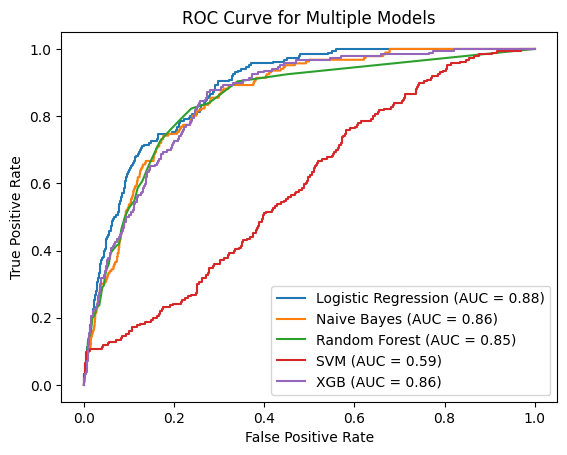

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Define the models
models = [model_lr, model_nb, model_rf, model_svm,model_xgb]

# Define the labels for each model
labels = ['Logistic Regression', 'Naive Bayes', 'Random Forest','SVM','XGB']
all_auc = []

# Iterate over each model and plot its ROC curve
for i, model in enumerate(models):
    # Calculate the false positive rate and true positive rate
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
    
    # Calculate the area under the ROC curve (AUC)
    roc_auc = auc(fpr, tpr)
    all_auc.append(roc_auc)
    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f'{labels[i]} (AUC = {roc_auc:.2f})')
    
# Add labels and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multiple Models')
plt.legend(loc='lower right')

# Show the plot
plt.show()


In [ ]:
all_auc

[0.8817997452154687,
 0.8563676609120505,
 0.8451152875599746,
 0.5941006642945348,
 0.8559442402588845]

In [ ]:
test_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,15304,0,57.0,0,0,1,0,0,82.54,33.4,0
1,15305,0,70.0,1,0,1,0,1,72.06,28.5,1
2,15306,1,5.0,0,0,1,0,1,103.72,19.5,2
3,15307,0,56.0,0,0,1,0,0,69.24,41.4,0
4,15308,1,32.0,0,0,0,0,1,111.15,30.1,0


In [ ]:
test_id = test_data['id']


In [ ]:
test_id

0        15304
1        15305
2        15306
3        15307
4        15308
         ...  
10199    25503
10200    25504
10201    25505
10202    25506
10203    25507
Name: id, Length: 10204, dtype: int64

In [ ]:
test_att = test_data.drop(['id'],axis = 1, inplace = False)

In [ ]:
test_att

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,57.0,0,0,1,0,0,82.54,33.4,0
1,0,70.0,1,0,1,0,1,72.06,28.5,1
2,1,5.0,0,0,1,0,1,103.72,19.5,2
3,0,56.0,0,0,1,0,0,69.24,41.4,0
4,1,32.0,0,0,0,0,1,111.15,30.1,0
...,...,...,...,...,...,...,...,...,...,...
10199,1,27.0,0,0,1,0,0,75.77,17.6,3
10200,0,49.0,0,0,1,0,0,102.91,26.7,0
10201,0,3.0,0,0,1,2,0,104.04,18.3,1
10202,0,31.0,0,0,1,0,0,82.41,28.7,0


In [ ]:
test_prob = model_lr.predict_proba(test_att)[:,1]
test_prob = test_prob.round(2)

In [ ]:
test_prob1 = model_lr.predict_proba([[0,	57.0,	0,	0,	1,	0,	0,	82.54,	33.4, 0]])
print(test_prob1)

[[0.96340142 0.03659858]]


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
prob_df = pd.DataFrame(test_prob)

In [ ]:
prob_df

,0
0,0.04
1,0.15
2,0.00
3,0.04
4,0.01
...,...
10199,0.00
10200,0.02
10201,0.00
10202,0.00


In [ ]:
result = pd.merge(test_id,prob_df,left_index = True, right_index = True, how = 'left')

In [ ]:
result.columns.values[1] = 'Stroke'

In [ ]:
result.head()

,id,Stroke
0,15304,0.04
1,15305,0.15
2,15306,0.00
3,15307,0.04
4,15308,0.01


In [ ]:
datatoexcel = pd.ExcelWriter('submission.xlsx')
result.to_excel(datatoexcel, index=False)
datatoexcel.save()

In [ ]:
import pickle

In [ ]:
pickle.dump(model_lr, open('model.pkl','wb'))

In [ ]:
model = pickle.load(open('model.pkl','rb'))

In [ ]:
# test_data[:3]